# Fluent Python Book Examples

> This notebook was created to implement and test some examples that is shown during the Fluent Python reading.

---
### Table of contents

- [Chapter 1 - The Python Data Model](#Chap1)

- [Chapter 2 - An Array of Sequences](#Chap2)

    - [Tuples](#Chap2-1)
    - [Slicing](#Chap2-2)
    - [`bisect` sort function](#Chap2-3)
    - [Arrays, MemoryViews and Deques](#Chap2-4)
    
- [Chapter 3 - Dictionaries and Sets](#Chap3)

    - [Hashable](#Chap3-1)
    - [Dict comprehension](#Chap3-2)
    - [Function `SetDefault()`](#Chap3-3)
    - [Variations of `dict`](#Chap3-4)
    - [Subclassing `UserDict`](#Chap3-5)
    - [Immutable mappings](#Chap3-6)
    - [Set theory](#Chap3-7)
    - [Set comprehension](#Chap3-8)
    
- [Chapter 4 - Text versus bytes](#Chap4)
    - [Character issues](#Chap4-1)
    - [Byte essentials](#Chap4-2)
    - [Basic encoders/decoders](#Chap4-3)
    - [Understanding encode/decode problems](#Chap4-4)
    - [Handling text files](#Chap4-5)
    - [Normalizing Unicode for saner comparisons](#Chap4-6)
    - [Sorting Unicode text](#Chap4-7)
    - [The Unicode database](#Chap4-8)
    - [Dual mode `str` and `bytes` APIs](#Chap4-9)

<a id='Chap1'></a>

---

### Chapter 1 - The Python Data Model

#### A pythonic card deck

In [1]:
import collections
Card = collections.namedtuple('Card', ['rank', 'suit'])
class FrenchDeck:
    ranks = [str(n) for n in range(2,11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank,suit) for suit in self.suits
                                       for rank in self.ranks]
    
    #def __repr__(self):
    #    return 'FrenchDeck(ranks %r , suits %r )' % (self.ranks, self.suits)
    
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

In [2]:
print(FrenchDeck.ranks)
print(FrenchDeck.suits)

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
['spades', 'diamonds', 'clubs', 'hearts']


In [3]:
beer_card = Card('7','diamonds')
beer_card

Card(rank='7', suit='diamonds')

In [4]:
deck = FrenchDeck()
len(deck)

52

In [5]:
print('First Card on deck: ', deck[0])  # the behavior of the '[]' operator is given by '__getitem__' function
print('Last Card on deck: ', deck[-1])        

First Card on deck:  Card(rank='2', suit='spades')
Last Card on deck:  Card(rank='A', suit='hearts')


In [6]:
from random import choice
choice(deck)

Card(rank='5', suit='spades')

The `__getitem__` function implementation (delegates the behavior to the operator `[]`) allows the use of slicing (`[::]`) and makes the class iterable

In [7]:
print('Top three cards from the deck: ', deck[:3])

Top three cards from the deck:  [Card(rank='2', suit='spades'), Card(rank='3', suit='spades'), Card(rank='4', suit='spades')]


In [8]:
aces_deck = deck[12::13] # gets some cards skipping 13 starting with 12
for card in aces_deck:
    print(card)

Card(rank='A', suit='spades')
Card(rank='A', suit='diamonds')
Card(rank='A', suit='clubs')
Card(rank='A', suit='hearts')


In [9]:
for card in reversed(aces_deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='A', suit='spades')


In [10]:
Card('Q', 'hearts') in deck

True

In [11]:
Card('Q', 'hearts') in aces_deck

False

#### Emulating numeric types

In [12]:


from math import hypot
class Vector:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    def __repr__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)
    def __abs__(self):
        return hypot(self.x, self.y)
    def __bool__(self):
        return bool(abs(self))
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

In [13]:
v1 = Vector(2,4)  # __init__ special function behavior
v2 = Vector(2,1)
v_sum = v1 + v2 # __add__ special function behavior
v_sum # __repr__ special function behavior

Vector(4, 5)

(0, 6)

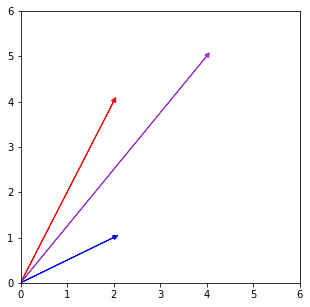

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f,ax = plt.subplots(figsize=(5.0, 5.0))
ax.arrow(0,0,v1.x, v1.y, head_width=0.1,head_length=0.1, color='r')
ax.arrow(0,0,v2.x, v2.y, head_width=0.1,head_length=0.1, color='b')
ax.arrow(0,0,v_sum.x, v_sum.y, head_width=0.1,head_length=0.1, color='darkorchid')
ax.set_xlim(0,6)
ax.set_ylim(0,6)

In [15]:
v = Vector(3,4)
abs(v)

5.0

In [16]:
v*3 # __mul__ special function behavior

Vector(9, 12)

In [17]:
abs(v*3) # __abs__ special function behavior

15.0

<a id='Chap2'></a>

---
### Chapter 2 - An array of sequences

#### List Comprehensions and generator expressions
> They use the same syntax, in which _Listcomps_ are enclosed in brackets [] and GenExps in parenthesis ().

In [18]:
symbols = '$¢£¥€¤'

In [19]:
# WITHOUT List Comprehensions
codes = []
for symbol in symbols:
    codes.append( ord(symbol) )
codes

[36, 162, 163, 165, 8364, 164]

In [20]:
# WITH List Comprehensions
codes_listcomp = [ord(symbol) for symbol in symbols]
codes_listcomp

[36, 162, 163, 165, 8364, 164]

In [21]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']

In [22]:
# Ordered by color
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [23]:
for color in colors:
    for size in sizes:
        print((color, size))

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


In [24]:
# Ordered by size
tshirts = [(color, size) for size in sizes for color in colors ]
tshirts

[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

In [25]:
# GenExps
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [26]:
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


**NOTE** :
* ListComps (List comprehensions) construct an entire list
* Genexps (Generator expressions) yields items one by one; a list is never produced in example above.
<a id='Chap2-1'></a>

#### Tuples are not just immutable lists

In [27]:
# tuple unpacking
lax_coordinates = (33.9425, -118.408056) # creating a tuple (it is implicit by parenthesis operator)
latitude, longitude = lax_coordinates # unpacking
print('Lax global coordinates - Latitude:', latitude, 'Longitude:', longitude)

Lax global coordinates - Latitude: 33.9425 Longitude: -118.408056


In [28]:
# unpacking with prefixing an argument with star
t = (20,8)
quotient, remainder = divmod(*t) # 'divmod' functions requires two argments, the star (*) operator unpacks tuple 't'
print('Quotient:',quotient,'\nRemainder:',remainder)

Quotient: 2 
Remainder: 4


In [29]:
quotient, _ = divmod(*t) # '_' is used as placeholder for certain part of a tuple that is not important in the unpacking process 

In [30]:
a,b, *rest = range(5) # star (*) operator used in a parallel assignment to put together some items of a tuple
a,b, rest

(0, 1, [2, 3, 4])

In [31]:
*head, a, b = range(5)
c, d, *midle, e = range(5)
head,a,b

([0, 1, 2], 3, 4)

In [32]:
c,d,midle,e

(0, 1, [2, 3], 4)

<a id='Chap2-2'></a>

#### Slincing

In [33]:
l = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [34]:
l[:2]

[10, 20]

In [35]:
l[2:]

[30, 40, 50, 60, 70, 80, 90]

In [36]:
l[::2] # slicing with steps

[10, 30, 50, 70, 90]

In [37]:
l[3::2]

[40, 60, 80]

In [38]:
l[2::2]

[30, 50, 70, 90]

In [39]:
l[2:8:2]

[30, 50, 70]

In [40]:
SLC = slice(2,8,2) # slice object does not work with '[]' operator

In [41]:
l[SLC]

[30, 50, 70]

In [42]:
l[3:5] = [0,0,0]

In [43]:
l

[10, 20, 30, 0, 0, 0, 60, 70, 80, 90]

In [44]:
l * 2

[10, 20, 30, 0, 0, 0, 60, 70, 80, 90, 10, 20, 30, 0, 0, 0, 60, 70, 80, 90]

In [45]:
l + [2]

[10, 20, 30, 0, 0, 0, 60, 70, 80, 90, 2]

In [46]:
t = (1, 2, [30, 40]) # it is not a good idea put mutable data into a tuple!!!!
# t[2] += [50, 60] # to see the 

In [47]:
t

(1, 2, [30, 40])

In [48]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits) # this function does NOT change the original list

['apple', 'banana', 'grape', 'raspberry']

In [49]:
fruits.sort() # this function DOES change the original list
fruits

['apple', 'banana', 'grape', 'raspberry']

<a id='Chap2-3'></a>

#### `bisect`  sort function
> This function is used to find a needle in a haystack.

In [50]:
import bisect
import sys

HAYSTACK = [1, 4, 5, 6, 8, 12, 15, 20, 21, 23, 23, 26, 29, 30]

NEEDLES = [0, 1, 2, 5, 8, 10, 22, 23, 29, 30, 31]
ROW_FMT = '{0:2d} @ {1:2d} \t {2}{0:<2d}'

def demo(bisect_fn):
    for needle in reversed(NEEDLES):
        position = bisect_fn(HAYSTACK, needle)
        offset = position * ' |'
        print(ROW_FMT.format(needle, position, offset))

if __name__ == '__main__':
    
    #bisect_fn = bisect.bisect_left
    bisect_fn = bisect.bisect
    
    print('DEMO:', bisect_fn.__name__)
    print('haystack ->', ' '.join('%2d' % n for n in HAYSTACK))
    demo(bisect_fn)

DEMO: bisect
haystack ->  1  4  5  6  8 12 15 20 21 23 23 26 29 30
31 @ 14 	  | | | | | | | | | | | | | |31
30 @ 14 	  | | | | | | | | | | | | | |30
29 @ 13 	  | | | | | | | | | | | | |29
23 @ 11 	  | | | | | | | | | | |23
22 @  9 	  | | | | | | | | |22
10 @  5 	  | | | | |10
 8 @  5 	  | | | | |8 
 5 @  3 	  | | |5 
 2 @  1 	  |2 
 1 @  1 	  |1 
 0 @  0 	 0 


In [51]:
import bisect
import random

SIZE = 7

random.seed(1729)
my_list = []

for i in range(SIZE):
    new_item = random.randrange(SIZE*2)
    bisect.insort(my_list, new_item)
    print('%2d ->' % new_item, my_list)

10 -> [10]
 0 -> [0, 10]
 6 -> [0, 6, 10]
 8 -> [0, 6, 8, 10]
 7 -> [0, 6, 7, 8, 10]
 2 -> [0, 2, 6, 7, 8, 10]
10 -> [0, 2, 6, 7, 8, 10, 10]


<a id='Chap2-4'></a>

#### Arrays
> If all you want to put in the list are numbers, an array.array is more efficient than a
list: it supports all mutable sequence operations (including .pop, .insert and .ex
tend), and additional methods for fast loading and saving such as .frombytes
and .tofile.

#### MemoryView
> The `memorview` class is a shared-memory sequence type that lets you handle
slices of arrays without copying bytes. It was inspired by the NumPy library.

#### Deques and other queues

In [52]:
from collections import deque
dq = deque(range(10), maxlen=10)
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
dq.rotate(3)
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [54]:
dq.rotate(-4)
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [55]:
dq.appendleft(-1)
dq

deque([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
dq.extend([11, 22, 33])
dq

deque([3, 4, 5, 6, 7, 8, 9, 11, 22, 33])

<a id='Chap3'></a>

---
### Chapter 3 - Dictionaries and sets
> Both, dictionaries and sets, are implemented with _hash table_. So, Knowing how _hash table_ works is key to making the most dictionaries and sets.

In [57]:
import collections
from collections import abc
my_dict={} # _hashable type_
isinstance(my_dict, abc.Mapping)

True

<a id='Chap3-1'></a>

### _hashable_
> An object is hashable if it has a hash value which never changes during its lifetime (it needs a \_\_hash\_\_() method), and can be compared to other objects (it needs an \_\_eq\_\_() method). Hashable objects which compare equal must have the same hash value.

A tuple is hashable only if all its items are hashable:

In [58]:
tt = (1,2,(30,40))
hash(tt)

8027212646858338501

In [59]:
tl = (1,2,[30,40]) # Unrashable

Building a dict:

In [60]:
a = dict(one=1, two=2, three=3)
b = {'one': 1, 'two': 2, 'three': 3}
c = dict(zip(['one', 'two', 'three'], [1, 2, 3]))
d = dict([('two', 2), ('one', 1), ('three', 3)])
e = dict({'three': 3, 'one': 1, 'two': 2})
a == b == c == d == e

True

<a id='Chap3-2'></a>

#### Dict compreehensions

In [61]:
DIAL_CODES = [
    (86, 'China'),
    (91, 'India'),
    (1, 'United States'),
    (62, 'Indonesia'),
    (55, 'Brazil'),
    (92, 'Pakistan'),
    (880, 'Bangladesh'),
    (234, 'Nigeria'),
    (7, 'Russia'),
    (81, 'Japan'),
]
country_code = {country: code for code, country in DIAL_CODES}
country_code

{'Bangladesh': 880,
 'Brazil': 55,
 'China': 86,
 'India': 91,
 'Indonesia': 62,
 'Japan': 81,
 'Nigeria': 234,
 'Pakistan': 92,
 'Russia': 7,
 'United States': 1}

In [62]:
{code: country.upper() for country, code in country_code.items() if code < 66}

{1: 'UNITED STATES', 7: 'RUSSIA', 55: 'BRAZIL', 62: 'INDONESIA'}

<a id='Chap3-3'></a>

#### Function setdefault()
> With this function, it is possible to search a key just one time and assign some value for it.

In [63]:
my_dict = {}
my_dict[55] = ['Brazil']
my_dict[86] = ['China']
my_dict[91] = ['India']

In [64]:
# 1st Approach
Country = my_dict.get(1,[]) # One Search - Locate
Country.append('United States')
my_dict[1] = Country # Two Search - Assign

In [65]:
my_dict

{1: ['United States'], 55: ['Brazil'], 86: ['China'], 91: ['India']}

In [66]:
# 2nd Approach
my_dict.setdefault(7,[]).append('Russia') # Just One Search - Locate and Assign

In [67]:
my_dict

{1: ['United States'],
 7: ['Russia'],
 55: ['Brazil'],
 86: ['China'],
 91: ['India']}

In [68]:
# DefaultDict - Another approach - more simple
dd = collections.defaultdict(list)
dd

defaultdict(list, {})

In [69]:
dd[1].append('United States')
dd[7].append('Russia')
dd

defaultdict(list, {1: ['United States'], 7: ['Russia']})

<a id='Chap3-4'></a>

#### Variations of `dict`

In [70]:
my_odict = collections.OrderedDict()
my_odict['c'] = 'test'
my_odict['a'] = 'test 1'
my_odict['b'] = 'test 2'
my_odict

OrderedDict([('c', 'test'), ('a', 'test 1'), ('b', 'test 2')])

In [71]:
k,v = my_odict.popitem(last=True)
print(k, v)

b test 2


In [72]:
my_odict

OrderedDict([('c', 'test'), ('a', 'test 1')])

In [73]:
my_cdict = collections.Counter('Mr Anderson')
my_cdict

Counter({' ': 1,
         'A': 1,
         'M': 1,
         'd': 1,
         'e': 1,
         'n': 2,
         'o': 1,
         'r': 2,
         's': 1})

In [74]:
my_cdict.update('Trinity')
my_cdict

Counter({' ': 1,
         'A': 1,
         'M': 1,
         'T': 1,
         'd': 1,
         'e': 1,
         'i': 2,
         'n': 3,
         'o': 1,
         'r': 3,
         's': 1,
         't': 1,
         'y': 1})

In [75]:
my_cdict.most_common(3)

[('r', 3), ('n', 3), ('i', 2)]

<a id='Chap3-5'></a>

#### Subclassing `UserDict`

> The main reason why it’s preferable to subclass from `UserDict` than `dict` is that the
built-in has some implementation shortcuts that end up forcing us to override methods
that we can just inherit from `UserDict` with no problems4.

In [76]:
import collections

class StrKeyDict( collections.UserDict ):
    def __missing__(self, key):
        if isinstance(key,str):
            raise KeyError(key)
        return self[str[key]]
    
    def __contains__(self, key):
        return str(key) in self.data
    
    def __setitem__(self, key, item):
        self.data[str(key)] = item

<a id='Chap3-6'></a>

#### Immutable mappings

In [77]:
from types import MappingProxyType
d = {1:'A'}
d_proxy = MappingProxyType(d)
d_proxy[1]

'A'

In [78]:
# d_proxy[2] = 'B' # To see the error uncomment this line

In [79]:
d[2] = 'B'
d_proxy[2]

'B'

In [80]:
d_proxy

mappingproxy({1: 'A', 2: 'B'})

* Mapping Proxy allows to visualize the data from original Mapping, but it is not possible to change it.

<a id='Chap3-7'></a>

#### Set theory

As `set` is a collection of unique objects.

In [81]:
l = ['spam','spam', 'eggs', 'spam']
s = set(l)
s

{'eggs', 'spam'}

In [82]:
haystack = set([1,5,6,23,78,2,4,10])
haystack

{1, 2, 4, 5, 6, 10, 23, 78}

In [83]:
needles = set([5,10,25,50])
needles

{5, 10, 25, 50}

In [84]:
len(needles & haystack) # Operator '&' returns the intersection between sets

2

In [85]:
len(needles | haystack) # Operator '&' returns the union between sets

10

In [86]:
dif = needles - haystack # Operator '-' returns the differece between sets
print( ' ', len(dif),'\n', dif ) 

  2 
 {25, 50}


In [87]:
dif = haystack - needles
print( ' ', len(dif),'\n', dif ) 

  6 
 {1, 2, 4, 6, 78, 23}


In [88]:
# Set literals
MySet = {3,68,23,45} # Creating a set
EmptySet = set()     # creating a empty ser, the sintax is a little bit different

In [89]:
type(MySet)

set

In [90]:
from dis import dis
dis('{1}') # Set literals are faster because executes less steps to build a set.

  1           0 LOAD_CONST               0 (1)
              2 BUILD_SET                1
              4 RETURN_VALUE


In [91]:
dis('set([1])')  # This sintax build a list then pass it to set constructor. Slower than literals.

  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 BUILD_LIST               1
              6 CALL_FUNCTION            1
              8 RETURN_VALUE


In [92]:
# there is no special sintax (literals) for 'frozenset'
frozenset(range(10)) # To build a 'frozenset' the constructor must be called

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

<a id='Chap3-8'></a>

#### Set Comprehensions

In [93]:
from unicodedata import name
{chr(i) for i in range(32,256) if 'SIGN' in name(chr(i),'')}

{'#',
 '$',
 '%',
 '+',
 '<',
 '=',
 '>',
 '¢',
 '£',
 '¤',
 '¥',
 '§',
 '©',
 '¬',
 '®',
 '°',
 '±',
 'µ',
 '¶',
 '×',
 '÷'}

In [94]:
code = 165
chr(code), name(chr(code),'')

('¥', 'YEN SIGN')

In [95]:
s = {i for i in range(10)}
s

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [96]:
z = {i for i in range(5,15)}
z

{5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [97]:
s & z # Intersection operator

{5, 6, 7, 8, 9}

In [98]:
s | z # Union operator

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [99]:
print(s - z,' ',z - s) # diference between sets

{0, 1, 2, 3, 4}   {10, 11, 12, 13, 14}


In [100]:
s ^ z # Symmetric difference 's-z U z-s'

{0, 1, 2, 3, 4, 10, 11, 12, 13, 14}

<a id='Chap4'></a>

---
### Chapter 4 - Text versus bytes
> Humans use text. computers speak bytes.

Converting from code points to bytes is encoding; from bytes to code points is decoding.

<a id='Chap4-1'></a>
#### Character issues

In [101]:
s = 'café'
print( s )
print( len(s) )

café
4


In [102]:
b = s.encode('utf8')
print( b ) # bytes literals start with a 'b' prefix
print( len(b) )
b.decode('utf8')

b'caf\xc3\xa9'
5


'café'

<a id='Chap4-2'></a>
#### Byte essentials

In [103]:
cafe = bytes('café', encoding='utf8')
print( cafe )
print( cafe[0] )
print( cafe[:1] )

b'caf\xc3\xa9'
99
b'c'


In [104]:
cafe_arr = bytearray(cafe)
print( cafe_arr ) # there is no bytearray literals
print( cafe_arr[-1:] ) # A slice

bytearray(b'caf\xc3\xa9')
bytearray(b'\xa9')


The fact that `cafe[0]` retrieves an int but `cafe[:1]` returns a bytes object of length `1` should not be surprising. The only sequence type where s[0] == s[:1] is the `str` type. This behavior of `str` is exceptional.

In [105]:
s[0] == s[:1]

True

In [106]:
cafe[0] == cafe[:1]

False

In [107]:
bytes.fromhex('31 4B CE A9')

b'1K\xce\xa9'

In [108]:
bytes( 'Café'.encode() )

b'Caf\xc3\xa9'

In [109]:
import array
numbers = array.array('h',[ -2, -1, 0, 1, 2])
octets = bytes(numbers)
octets

b'\xfe\xff\xff\xff\x00\x00\x01\x00\x02\x00'

<a id='Chap4-3'></a>
#### Basic encoders/decoders

In [110]:
for codec in ['latin_1', 'utf_8', 'utf_16']:
    print(codec, 'El Niño'.encode(codec), sep='\t')

latin_1	b'El Ni\xf1o'
utf_8	b'El Ni\xc3\xb1o'
utf_16	b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


<a id='Chap4-4'></a>
#### Understanding encode/decode problems

In [111]:
city = 'São Paulo'
print( city.encode('utf_8') )
print( city.encode('utf_16') )
print( city.encode('iso8859_1') )
# print( city.encode('cp437') ) # UnicodeEncodeError: 'charmap' codec can't encode character '\xe3' in position 1 -> 'ã'

b'S\xc3\xa3o Paulo'
b'\xff\xfeS\x00\xe3\x00o\x00 \x00P\x00a\x00u\x00l\x00o\x00'
b'S\xe3o Paulo'


In [112]:
print( city.encode('cp437', errors='ignore') )
print( city.encode('cp437', errors='replace') )
print( city.encode('cp437', errors='xmlcharrefreplace') )

b'So Paulo'
b'S?o Paulo'
b'S&#227;o Paulo'


In [113]:
octets = b'Montr\xe9al'
print( octets.decode('cp1252') )
print( octets.decode('iso8859_7') )
print( octets.decode('koi8_r') )
#print( octets.decode('utf8') ) # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 5

Montréal
Montrιal
MontrИal


In [114]:
print( octets.decode('utf8', errors='replace') )

Montr�al


In [115]:
ε = 10**-6 # ε = epsilon -> non_ASCII identifiers
print(ε)

1e-06


In [116]:
u16 = 'El Niño'.encode('utf_16')
u16

b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'

In [117]:
list(u16) # There are two extra characters at the begining -> E = 69

[255, 254, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

In [118]:
u16le = 'El Niño'.encode('utf_16le')
list(u16le)

[69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

In [119]:
u16be = 'El Niño'.encode('utf_16be')
list(u16be)

[0, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111]

<a id='Chap4-5'></a>
#### Handling text files

In [120]:
open('cafe.txt','w', encoding='utf_8').write('café')

4

In [121]:
open('cafe.txt').read()

'cafÃ©'

In [122]:
fp = open('cafe.txt', 'w', encoding='utf_8')
fp

<_io.TextIOWrapper name='cafe.txt' mode='w' encoding='utf_8'>

In [123]:
fp.write('café')
fp.close()
import os
os.stat('cafe.txt').st_size

5

In [124]:
fp2 = open('cafe.txt')
fp2

<_io.TextIOWrapper name='cafe.txt' mode='r' encoding='cp1252'>

In [125]:
fp2.encoding

'cp1252'

In [126]:
fp2.read()

'cafÃ©'

In [127]:
fp3 = open('cafe.txt', encoding='utf_8')
fp3

<_io.TextIOWrapper name='cafe.txt' mode='r' encoding='utf_8'>

In [128]:
fp3.read()

'café'

In [129]:
fp4 = open('cafe.txt', 'rb')
fp4

<_io.BufferedReader name='cafe.txt'>

In [130]:
fp4.read()

b'caf\xc3\xa9'

<a id='Chap4-6'></a>
#### Normalizing Unicode for saner comparisons

In [131]:
s1 = 'café'
s2 = 'cafe\u0301'
s1, s2

('café', 'café')

In [132]:
len(s1), len(s2)

(4, 5)

In [133]:
s1 == s2

False

For a fair comparison you have to normalize the strings in such a way that they can be compared.

In [134]:
from unicodedata import normalize
s1 = 'café' # composed "e" with acute accent
s2 = 'cafe\u0301' # decomposed "e" and acute accent
len(s1), len(s2)

(4, 5)

In [135]:
len(normalize('NFC', s1)), len(normalize('NFC', s2))

(4, 4)

In [136]:
len(normalize('NFD', s1)), len(normalize('NFD', s2))

(5, 5)

In [137]:
print( normalize('NFC', s1) == normalize('NFC', s2) )
print( normalize('NFD', s1) == normalize('NFD', s2) )

True
True


In [138]:
from unicodedata import name
ohm = '\u2126'
name(ohm), ohm

('OHM SIGN', 'Ω')

In [139]:
ohm_c = normalize('NFC', ohm)
name(ohm_c), ohm_c

('GREEK CAPITAL LETTER OMEGA', 'Ω')

In [140]:
print( ohm == ohm_c )
print( normalize('NFC', ohm) == normalize('NFC', ohm_c) )

False
True


In [141]:
half = '½'
normalize('NFKC', half)

'1⁄2'

In [142]:
four_squared = '4²'
normalize('NFKC', four_squared)

'42'

In [143]:
micro = 'µ'
micro_kc = normalize('NFKC', micro)
micro, micro_kc

('µ', 'μ')

In [144]:
ord(micro), ord(micro_kc)

(181, 956)

In [145]:
name(micro), name(micro_kc)

('MICRO SIGN', 'GREEK SMALL LETTER MU')

In [146]:
micro = 'µ'
name(micro)

'MICRO SIGN'

In [147]:
micro_cf = micro.casefold()
name(micro_cf)

'GREEK SMALL LETTER MU'

In [148]:
micro, micro_cf

('µ', 'μ')

In [149]:
eszett = 'ß'
name(eszett)

'LATIN SMALL LETTER SHARP S'

In [150]:
eszett_cf = eszett.casefold()
eszett, eszett_cf

('ß', 'ss')

In [151]:
from unicodedata import normalize

def nfc_equal(str1, str2): # For normalization
    return normalize('NFC', str1) == normalize('NFC', str2)

def fold_equal(str1, str2): # For normalization and case insensitive
    return (normalize('NFC', str1).casefold() == normalize('NFC', str2).casefold())

In [152]:
print( s1, s2 )
print( s1 == s2 ) ## They are using diferent code points for 'é'

café café
False


In [153]:
print( nfc_equal(s1, s2) )
print( nfc_equal('A', 'a') )

True
False


In [154]:
s3 = 'Straße'
s4 = 'strasse'
s3 == s4

False

In [155]:
print( nfc_equal(s3, s4) )
print( fold_equal(s3, s4) )

False
True


In [156]:
print( fold_equal(s1, s2) )
print( fold_equal('A', 'a') )

True
True


In [157]:
import unicodedata
import string

def shave_marks(txt):
    """Remove all diacritic marks"""
    norm_txt = unicodedata.normalize('NFD', txt)
    shaved = ''.join(c for c in norm_txt if not unicodedata.combining(c))
    return unicodedata.normalize('NFC', shaved)

In [158]:
shave_marks('São Paulo'), shave_marks('Carroça'), shave_marks('Café')

('Sao Paulo', 'Carroca', 'Cafe')

In [159]:
shave_marks('“Herr Voß: • ½ cup of OEtker™ caffè latte • bowl of açaí.”')

'“Herr Voß: • ½ cup of OEtker™ caffe latte • bowl of acai.”'

In [160]:
shave_marks('Ζέφυρος, Zéfiro')

'Ζεφυρος, Zefiro'

<a id='Chap4-7'></a>
#### Sorting Unicode

In [161]:
fruits = ['caju', 'atemoia', 'cajá', 'açaí', 'acerola']
sorted(fruits)

['acerola', 'atemoia', 'açaí', 'caju', 'cajá']

In [162]:
import locale
locale.setlocale(locale.LC_COLLATE, '') # Here the string passed was empty (''). This way makes the setlocale get it from the OS.

'Portuguese_Brazil.1252'

In [163]:
sorted_fruits = sorted(fruits, key=locale.strxfrm)
sorted_fruits

['açaí', 'acerola', 'atemoia', 'cajá', 'caju']

<a id='Chap4-8'></a>
#### The Unicode database

In [164]:
import unicodedata
import re

re_digit = re.compile(r'\d')

sample = '1\xbc\xb2\u0969\u136b\u216b\u2466\u2480\u3285'

for char in sample:
    print('U+%04x' % ord(char),
    char.center(6),
    're_dig' if re_digit.match(char) else '-',
    'isdig' if char.isdigit() else '-',
    'isnum' if char.isnumeric() else '-',
    format(unicodedata.numeric(char), '5.2f'),
    unicodedata.name(char),
    sep='\t')

U+0031	  1   	re_dig	isdig	isnum	 1.00	DIGIT ONE
U+00bc	  ¼   	-	-	isnum	 0.25	VULGAR FRACTION ONE QUARTER
U+00b2	  ²   	-	isdig	isnum	 2.00	SUPERSCRIPT TWO
U+0969	  ३   	re_dig	isdig	isnum	 3.00	DEVANAGARI DIGIT THREE
U+136b	  ፫   	-	isdig	isnum	 3.00	ETHIOPIC DIGIT THREE
U+216b	  Ⅻ   	-	-	isnum	12.00	ROMAN NUMERAL TWELVE
U+2466	  ⑦   	-	isdig	isnum	 7.00	CIRCLED DIGIT SEVEN
U+2480	  ⒀   	-	-	isnum	13.00	PARENTHESIZED NUMBER THIRTEEN
U+3285	  ㊅   	-	-	isnum	 6.00	CIRCLED IDEOGRAPH SIX


<a id='Chap4-9'></a>
#### Dual mode `str` and `bytes` APIs

In [165]:
import re

re_numbers_str = re.compile(r'\d+')
re_words_str = re.compile(r'\w+')
re_numbers_bytes = re.compile(rb'\d+')
re_words_bytes = re.compile(rb'\w+')

text_str = ("Ramanujan saw \u0be7\u0bed\u0be8\u0bef" " as 1729 = 1³ + 12³ = 9³ + 10³.")
text_bytes = text_str.encode('utf_8')

print('Text', repr(text_str), sep='\n ')
print('Numbers')
print(' str :', re_numbers_str.findall(text_str))
print(' bytes:', re_numbers_bytes.findall(text_bytes))
print('Words')
print(' str :', re_words_str.findall(text_str))
print(' bytes:', re_words_bytes.findall(text_bytes))

Text
 'Ramanujan saw ௧௭௨௯ as 1729 = 1³ + 12³ = 9³ + 10³.'
Numbers
 str : ['௧௭௨௯', '1729', '1', '12', '9', '10']
 bytes: [b'1729', b'1', b'12', b'9', b'10']
Words
 str : ['Ramanujan', 'saw', '௧௭௨௯', 'as', '1729', '1³', '12³', '9³', '10³']
 bytes: [b'Ramanujan', b'saw', b'as', b'1729', b'1', b'12', b'9', b'10']


In [166]:
os.listdir('.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'biblio.bib',
 'cafe.txt',
 'environment.yml',
 'Fluent_Python_Book_Examples.ipynb',
 'ForTesting.ipynb',
 'NumPy-Tutorial.ipynb',
 'README.md',
 'SciPy-Tutorial.ipynb']

In [167]:
os.listdir(b'.')

[b'.git',
 b'.gitignore',
 b'.ipynb_checkpoints',
 b'biblio.bib',
 b'cafe.txt',
 b'environment.yml',
 b'Fluent_Python_Book_Examples.ipynb',
 b'ForTesting.ipynb',
 b'NumPy-Tutorial.ipynb',
 b'README.md',
 b'SciPy-Tutorial.ipynb']